In [34]:
# Install kaggle and dotenv libraries if needed
# !pip install kaggle
# !pip install dotenv

# Libraries for loading kaggle data and token anonimity in Github
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from dotenv import load_dotenv

# Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [35]:

# Load .env file to import personal Kaggle username and API key
load_dotenv()

# Set Kaggle credentials .env file
# Note that Kaggle credentials are obtained from your kaggle.json file
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# Authenticate with Kaggle API
api = KaggleApi()
api.authenticate()

# Download and unzip dataset
api.dataset_download_files('datasetengineer/eviot-predictivemaint-dataset', path='./', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/datasetengineer/eviot-predictivemaint-dataset


In [36]:
df = pd.read_csv('EV_Predictive_Maintenance_Dataset_15min.csv')
print(f'Downloaded CSV Data:')
df.head()

Downloaded CSV Data:


,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
0,2020-01-01 00:00:00,0.826099,0.941338,210.163881,-22.753095,27.149201,149.190930,48.496049,0.369095,113.435589,...,741.754518,103.421162,66.232383,0.520922,0.225970,260.503381,0,1,111.116697,0.852745
1,2020-01-01 00:15:00,0.064728,0.916059,364.000102,-27.701120,53.655101,171.702388,57.829492,1.449195,105.587160,...,769.134035,46.041935,3.146238,0.844005,0.204350,212.813954,0,2,179.229425,0.827616
2,2020-01-01 00:30:00,0.873643,0.908020,388.855089,-36.646406,29.559090,191.617645,46.518363,1.859045,119.610302,...,917.262931,59.588422,79.909148,0.992405,0.175125,273.394511,0,1,171.852663,0.876887
3,2020-01-01 00:45:00,0.853009,0.916476,370.570602,-37.609429,29.690283,111.881817,54.163681,0.381500,182.535625,...,600.598736,44.222285,0.774000,0.007615,0.213264,229.508442,0,0,165.221328,0.816290
4,2020-01-01 01:00:00,0.947540,0.913206,390.011904,-14.275808,28.864338,163.774377,42.075978,0.433927,173.298044,...,613.153029,41.374684,2.872124,0.771938,0.770257,257.302631,1,0,176.890659,0.744260


In [43]:
print(df.shape)

df_avg = df

# Convert from object to datetime
df_avg['Timestamp'] = pd.to_datetime(df_avg['Timestamp'])

df_avg['Timestamp'] = (df_avg['Timestamp'] - df_avg['Timestamp'].iloc[0]).dt.total_seconds() / 60
df_avg = df_avg.groupby(df.index//900).mean().reset_index(drop=True)

# print(df_avg.shape)

df_avg.head()
# df_avg.info()


(175393, 30)


,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
0,1.123750e-07,0.774050,0.890344,354.594054,-49.704360,33.374391,229.444263,56.122882,0.519701,183.044791,...,905.333047,56.972716,15.519929,1.441046,0.303646,216.824120,0.097778,0.476667,132.324095,0.758798
1,3.373750e-07,0.770040,0.883914,352.464748,-48.093645,33.217258,224.116949,56.334298,0.540546,179.720302,...,870.976512,57.402344,15.572584,1.543671,0.299372,215.461552,0.108889,0.518889,128.506956,0.744789
2,5.623750e-07,0.786443,0.879167,351.578072,-47.906614,33.122914,218.863375,55.362109,0.542792,182.891656,...,909.818770,58.067192,13.969777,1.538913,0.297116,217.145524,0.086667,0.530000,127.304572,0.743041
3,7.873750e-07,0.787542,0.879226,351.431010,-47.865638,33.229750,212.521786,55.809465,0.510660,184.629084,...,907.248934,58.514026,16.956550,1.413054,0.277158,212.980267,0.096667,0.484444,132.981833,0.735700
4,1.012375e-06,0.799291,0.882558,356.492984,-48.106922,33.425594,223.828395,56.397721,0.531702,178.173336,...,890.408257,57.544187,15.922932,1.619683,0.300025,214.334406,0.090000,0.503333,127.610135,0.753032


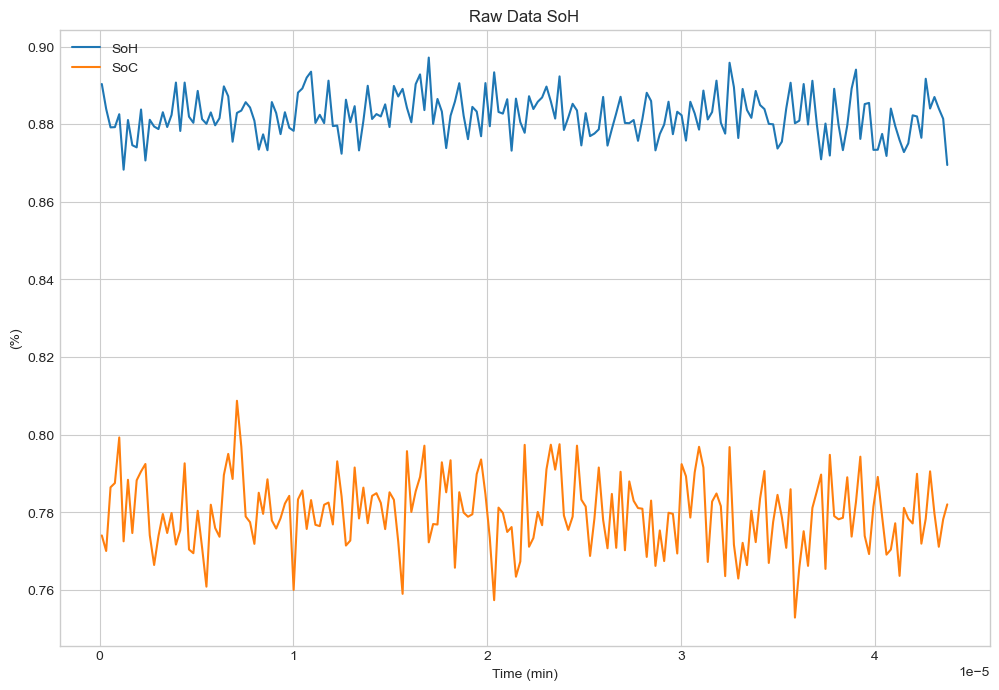

In [ ]:
# Plot of daily averaged SoH and SoC data
plt.style.use('seaborn-v0_8-whitegrid')
fig1, ax = plt.subplots(figsize=(12,8))

ax.plot(df_avg['Timestamp'], df_avg['SoH'], label='SoH')
ax.plot(df_avg['Timestamp'], df_avg['SoC'], label='SoC')
ax.set_title('Time Averaged Data')
ax.set_ylabel('(%)')
ax.set_xlabel('Time (min)')
plt.legend()
plt.show()

Text(0.5, 0, 'Time (min)')

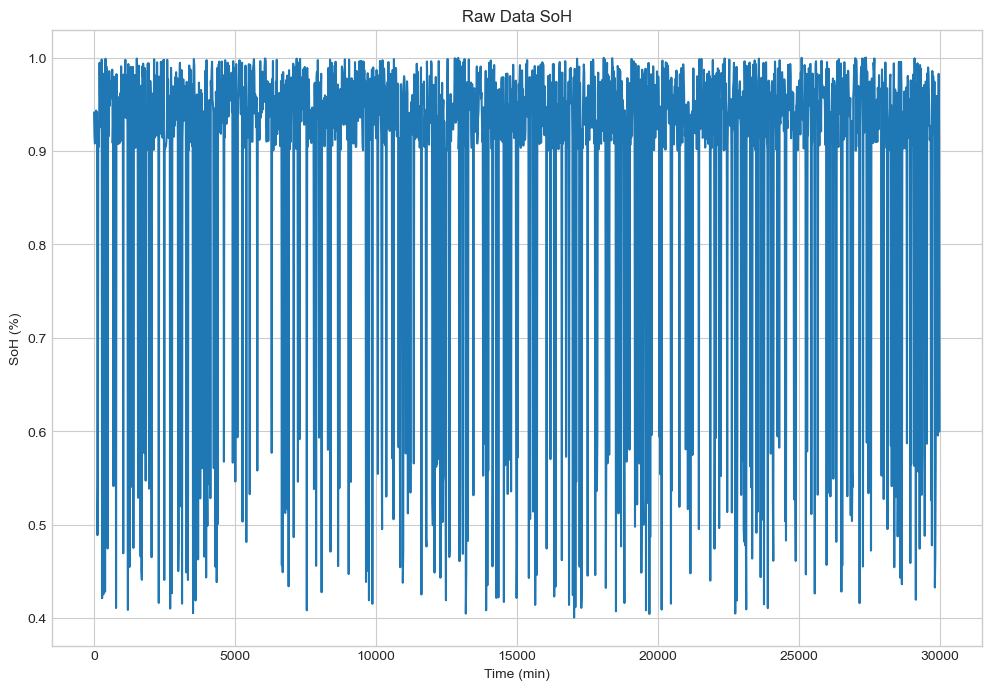

In [ ]:
# Plot of raw SoH data (every 15 mins)
plt.style.use('seaborn-v0_8-whitegrid')
fig1, ax = plt.subplots(figsize=(12,8))

ax.plot(df['Timestamp'][:2000], df['SoH'][:2000])
ax.set_title('Raw Data SoH')
ax.set_ylabel('SoH (%)')
ax.set_xlabel('Time (min)')